In [9]:
%load_ext autoreload
%autoreload 2

import sys
import os
working_path = '/home/users/alpv95/khome/SSCpol'
sys.path.insert(0, working_path)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import utils.junk as junk
from scipy import stats
from utils.jet_fns import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
!python3 ~/khome/SSCpol/runplotSED.py 1.5 --nblocks 7 --nsteps 100

gcc: error: src/jet_model.c: No such file or directory
gcc: error: src/mtwister.c: No such file or directory
gcc: error: include/mtwister.h: No such file or directory
gcc: error: src/jet_fns.c: No such file or directory
gcc: error: include/jet_fns.h: No such file or directory
Directory  workdir  already exists
Traceback (most recent call last):
  File "/home/users/alpv95/khome/SSCpol/runplotSED.py", line 40, in <module>
    subprocess.check_call(['./a.out', str(inpt[0]),str(inpt[1]),str(inpt[2]),str(inpt[3]),str(inpt[4]),str(inpt[5]),str(inpt[6]),str(inpt[7]),str(inpt[8]),str(inpt[9]) ])
  File "/share/software/user/open/python/3.6.1/lib/python3.6/subprocess.py", line 286, in check_call
    retcode = call(*popenargs, **kwargs)
  File "/share/software/user/open/python/3.6.1/lib/python3.6/subprocess.py", line 267, in call
    with Popen(*popenargs, **kwargs) as p:
  File "/share/software/user/open/python/3.6.1/lib/python3.6/subprocess.py", line 707, in __init__
    restore_signals, start

In [68]:
file = 'final2.0_7_90/'
S = np.loadtxt(working_path + file + 'SZ_final.txt')
IC = np.loadtxt(working_path + file + 'ICZ_final.txt')

n_blocks = 7
array_size = 50
#num = 188

In [69]:
S = S.reshape(-1,n_blocks,array_size,3)
IC = IC.reshape(-1,n_blocks,array_size,3)
num = IC.shape[0]
print(num)
#normalize stokes parameters
for s in range(num):
    for n in range(array_size):
        maxidx = []
        for h in range(n_blocks):
            z = S[s][h][n][0]
            S[s][h][n][:] /= z
            y = IC[s][h][n][0]
            IC[s][h][n][:] /= y
            maxidx.append(z)
#         #print(np.argmax(maxidx), np.max(maxidx),s,n)


188


/home/users/alpv95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/home/users/alpv95/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [76]:
IC_Pi = np.zeros((n_blocks,array_size)); S_Pi = np.zeros((n_blocks,array_size))
IC_P = np.zeros((n_blocks,array_size)); S_P = np.zeros((n_blocks,array_size))
IC_PA = np.zeros((n_blocks,array_size)); S_PA = np.zeros((n_blocks,array_size))

IC_Pi2 = np.zeros(array_size); S_Pi2 = np.zeros(array_size)
IC2 =  IC[:,1] + IC[:,0] #+ IC[:,4] + IC[:,5] #+ IC[:,3] + IC[:,2] + IC[:,6] #+ IC[:,0] #+ IC[:,3] + IC[:,2] + IC[:,6]
S2 = S[:,1] + S[:,0] #+ S[:,4] + S[:,5] #+ IC[:,3] + S[:,2] + S[:,6] #+ S[:,0] #+ S[:,3] + S[:,2] + S[:,6]
for s in range(num):
    for n in range(array_size):
        IC_Pi2[n] += (np.sqrt(IC2[s][n][1]*IC2[s][n][1] + IC2[s][n][2]*IC2[s][n][2]) / IC2[s][n][0]) / num
        S_Pi2[n] += (np.sqrt(S2[s][n][1]*S2[s][n][1] + S2[s][n][2]*S2[s][n][2]) / S2[s][n][0]) / num
        for h in range(n_blocks):
            IC_Pi[h][n] += (np.sqrt(IC[s][h][n][1]*IC[s][h][n][1] + IC[s][h][n][2]*IC[s][h][n][2]) / IC[s][h][n][0]) / num
            S_Pi[h][n] += (np.sqrt(S[s][h][n][1]*S[s][h][n][1] + S[s][h][n][2]*S[s][h][n][2]) / S[s][h][n][0]) / num
            
            IC_PA[h][n] += 0.5*np.arctan2(IC[s][h][n][2],IC[s][h][n][1]) / num
            S_PA[h][n] += 0.5*np.arctan2(S[s][h][n][2],S[s][h][n][1]) / num
            
            IC_P[h][n] += IC[s][h][n][0] / num
            S_P[h][n] += S[s][h][n][0] / num
            
            #if h==0 and n==40:
                #print(IC[s][h][n][0],IC[s][h][n][1], IC[s][h][n][2])
                            


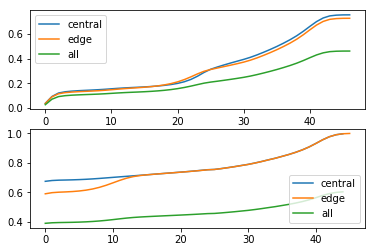

In [77]:
plt.subplot(211)
plt.plot(range(array_size),IC_Pi[0],label='central')
plt.plot(range(array_size),IC_Pi[1],label='edge')
plt.plot(range(array_size),IC_Pi2, label='all')
plt.legend()

plt.subplot(212)
plt.plot(range(array_size),S_Pi[0],label='central')
plt.plot(range(array_size),S_Pi[1],label='edge')
plt.plot(range(array_size),S_Pi2, label='all')
plt.legend()

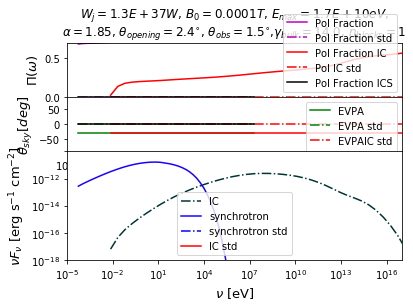

In [4]:
data_path = 'resultsNOLOSS/'
junk.plot_SED(working_path + data_path + 'TESTFIL1.txt',working_path + data_path + 'keyparams1.txt',working_path + data_path + 'freqrange1.txt')


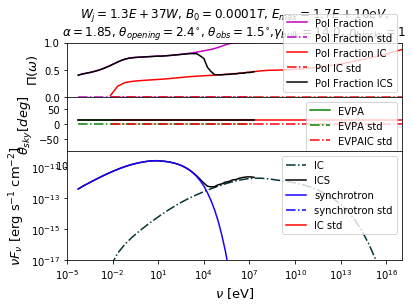

In [4]:
data_path = 'nbloc1_300/'
junk.plot_SED(working_path + data_path + 'TESTFIL1.txt',working_path + data_path + 'keyparams1.txt',working_path + data_path + 'freqrange1.txt')

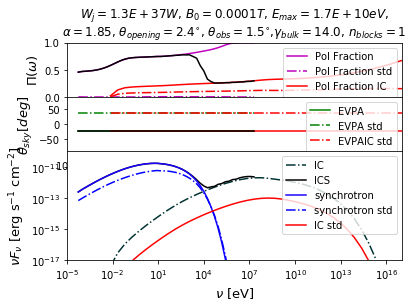

In [3]:
data_path = 'nbloc1_100/'
testfil_path = working_path + data_path + 'TESTFIL_mix.txt'
keyp_path = working_path + data_path + 'keyparams_mix.txt'
freq_path = working_path + data_path + 'freqrange_mix.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

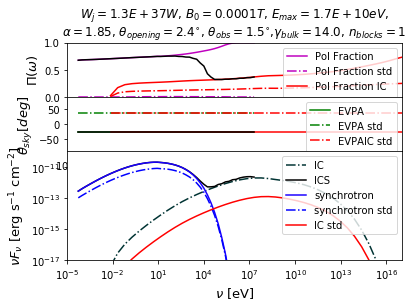

In [5]:
data_path = 'nbloc1_100/'
testfil_path = working_path + data_path + 'TESTFIL_nomix.txt'
keyp_path = working_path + data_path + 'keyparams_nomix.txt'
freq_path = working_path + data_path + 'freqrange_nomix.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

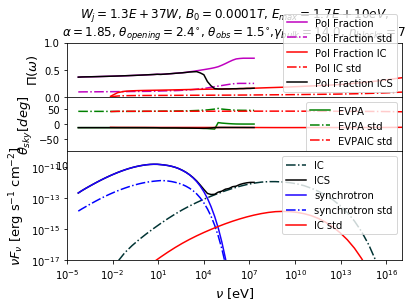

In [2]:
data_path = 'nbloc7_100/'
testfil_path = working_path + data_path + 'TESTFIL_nomix.txt'
keyp_path = working_path + data_path + 'keyparams_nomix.txt'
freq_path = working_path + data_path + 'freqrange_nomix.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

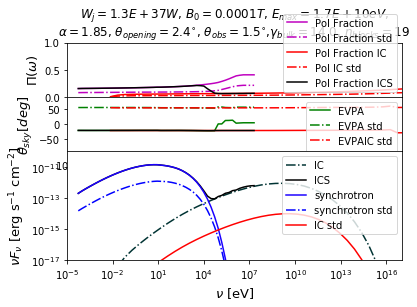

In [2]:
data_path = 'nbloc19_100/'
testfil_path = working_path + data_path + 'TESTFIL_nomix.txt'
keyp_path = working_path + data_path + 'keyparams_nomix.txt'
freq_path = working_path + data_path + 'freqrange_nomix.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

In [2]:
data_path = 'nbloc37_60/'
testfil_path = working_path + data_path + 'TESTFIL1.txt'
keyp_path = working_path + data_path + 'keyparams1.txt'
freq_path = working_path + data_path + 'freqrange1.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

OSError: /home/groups/kipac/alpv95/Romani/nbloc37_60/keyparams1.txt not found.

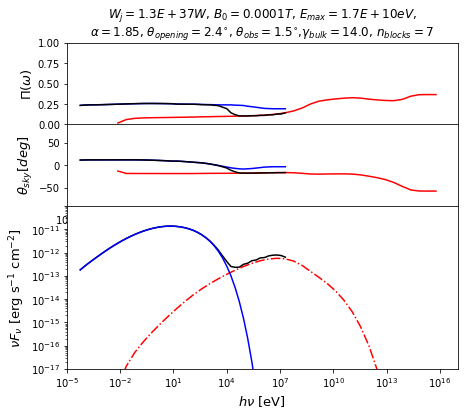

In [3]:
data_path = 'nbloc7_90/'
testfil_path = working_path + data_path + 'TESTFIL1.txt'
keyp_path = working_path + data_path + 'keyparams1.txt'
freq_path = working_path + data_path + 'freqrange1.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

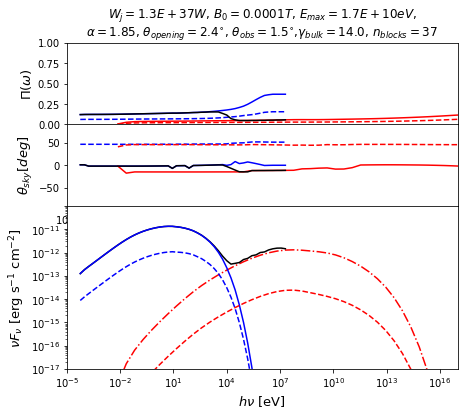

In [3]:
data_path = 'nbloc37_60/'
testfil_path = working_path + data_path + 'TESTFIL_final.txt'
keyp_path = working_path + data_path + 'keyparams_final.txt'
freq_path = working_path + data_path + 'freqrange_final.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

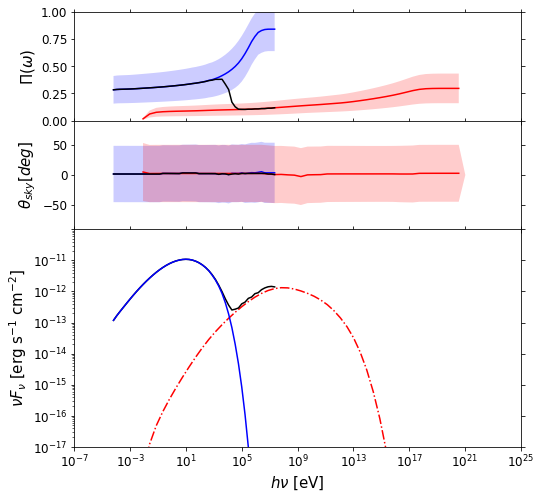

In [33]:
#plt.figure(size=(7,13))
working_path = '/home/groups/kipac/alpv95/Romani_theta/'
# data_path = 'final0.5_19_100/'
# testfil_path = working_path + data_path + 'TESTFIL_final.txt'
# keyp_path = working_path + data_path + 'keyparams_final.txt'
# freq_path = working_path + data_path + 'freqrange_final.txt'
# junk.plot_SED(testfil_path,keyp_path,freq_path)

# data_path = 'final1.5_19_100/'
# testfil_path = working_path + data_path + 'TESTFIL_final.txt'
# keyp_path = working_path + data_path + 'keyparams_final.txt'
# freq_path = working_path + data_path + 'freqrange_final.txt'
# junk.plot_SED(testfil_path,keyp_path,freq_path)

# data_path = 'final3.0_19_100/'
# testfil_path = working_path + data_path + 'TESTFIL_final.txt'
# keyp_path = working_path + data_path + 'keyparams_final.txt'
# freq_path = working_path + data_path + 'freqrange_final.txt'
# junk.plot_SED(testfil_path,keyp_path,freq_path)

# data_path = 'final4.5_19_100/'
# testfil_path = working_path + data_path + 'TESTFIL_final.txt'
# keyp_path = working_path + data_path + 'keyparams_final.txt'
# freq_path = working_path + data_path + 'freqrange_final.txt'
# junk.plot_SED(testfil_path,keyp_path,freq_path)

# data_path = 'Flsp3.0_37_95/'
# testfil_path = working_path + data_path + 'TESTFIL_final.txt'
# keyp_path = working_path + data_path + 'keyparams_final.txt'
# freq_path = working_path + data_path + 'freqrange_final.txt'
# junk.plot_SED(testfil_path,keyp_path,freq_path)

data_path = 'final0.5_7_100/'
testfil_path = working_path + data_path + 'TESTFIL_final.txt'
keyp_path = working_path + data_path + 'keyparams_final.txt'
freq_path = working_path + data_path + 'freqrange_final.txt'
junk.plot_SED(testfil_path,keyp_path,freq_path)

In [17]:
p=15498920598817198002561908096368640.000000; x=-99896031893473898681664420511219712.000000; y=196077067050823612018781779084181504.000000
p2=7007665476967659550945125461389213696.000000; x2=-1716762288144773036821524066477277184.000000; y2=322237290734058708882632465027432448.000000
print(np.sqrt(x**2 + y**2)/p)
print(np.sqrt(x2**2 + y2**2)/p2)
    

14.198265886507071
0.24926169512172022


In [2]:
def mad67(arr):
    """ Median Absolute Deviation: a "Robust" version of standard deviation.
        Indices variabililty of the sample.
        https://en.wikipedia.org/wiki/Median_absolute_deviation 
    """
    arr = np.ma.array(arr).compressed() # should be faster to not use masked arrays.
    med = np.median(arr)
    return np.sort(np.abs(arr - med))[np.int((len(arr)-1)/1.48)]

In [90]:
working_path = '/home/groups/kipac/alpv95/Romani/'
data_path = 'nbloc7_90/'
testfil_path = working_path + data_path + 'TESTFIL1.txt'
keyp_path = working_path + data_path + 'keyparams1.txt'
freq_path = working_path + data_path + 'freqrange1.txt'
array_size = 50

freq = np.loadtxt(freq_path)
fq_mids_IC = freq[:array_size,6]

In [4]:
from scipy.stats.stats import pearsonr, spearmanr

18 13
18 13
19 13
19 13
20 14


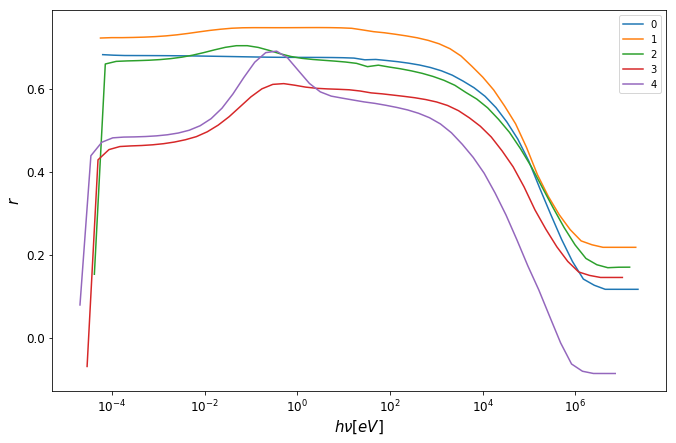

In [10]:
#angles = [0.1,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,6.0,8.0]
angles = [0.5,1.5,3.0,4.5,6.0]
names = ['final' + str(angle) + '_37_95' for angle in angles]

filename = [working_path + name + '/TESTFIL_final.txt' for name in names]
keyp_path = [working_path + name + '/keyparams_final.txt' for name in names]
freq_path = [working_path + name + '/freqrange_final.txt' for name in names]

pearsonsX = []
freqsX = []


# filename = working_path + 'final0.5_37_95' + '/TESTFIL_final.txt'
# key_path = working_path + 'final0.5_37_95' + '/keyparams_final.txt'
# freq_path = working_path + 'final0.5_37_95' + '/freqrange_final.txt'

for j,f in enumerate(filename):
    keyfile = keyp_path[j]
    freqfile = freq_path[j] 
    fullpi = np.loadtxt(f)
    array_size = 50
    n_examples = int(fullpi.shape[0]/array_size)
    pi = np.zeros((n_examples,array_size,3))
    pi_IC = np.zeros((n_examples,array_size,3))
    
    keydat = np.loadtxt(keyfile)
    theta_obs=keydat[0,2]#2.8
    W_j=keydat[0,0]#5.0E20
    gamma_bulk=keydat[0,1]#7.5#12.0
    theta_open_p = keydat[0,3]
    alpha = keydat[0,4]
    B0 = keydat[0,5]
    E_max = keydat[0,6]
    n_blocks = keydat[0,7]
    array_size = int(keydat[0,8]) #50, can change this here by hand
    
    beta_bulk=(1.0-(gamma_bulk**(-2.0)))**(0.5)
    doppler_factor = 1.0/(gamma_bulk*(1.0-beta_bulk*np.cos(np.deg2rad(theta_obs))))
    
    frdata = np.loadtxt(freqfile)*doppler_factor#*doppler_factor#*gamma_bulk*2.8
    fq_mins = frdata[:array_size,0]
    fq_maxs = frdata[:array_size,1]
    fq_mids = frdata[:array_size,2]
    fq_mins_IC = frdata[:array_size,4]
    fq_maxs_IC = frdata[:array_size,5]
    fq_mids_IC = frdata[:array_size,6]
    
    sync_idx = np.argmin(abs(freqtoeV(fq_mids) - 1))
    IC_idx = np.argmin(abs(freqtoeV(fq_mids_IC) - 10000))
    print(sync_idx, IC_idx)
 
    for i in range(n_examples): #calculates average pi/evpa/power over many jet realisations
        pi[i,:,0] = fullpi[(i*array_size):(i*array_size)+array_size,0]
        pi[i,:,1] = fullpi[(i*array_size):(i*array_size)+array_size,1]
        pi[i,:,2] = fullpi[(i*array_size):(i*array_size)+array_size,2]
        
        pi_IC[i,:, 0] = fullpi[(i * array_size):(i * array_size) + array_size, 3]
        pi_IC[i,:, 1] = fullpi[(i * array_size):(i * array_size) + array_size, 4]
        pi_IC[i,:, 2] = fullpi[(i * array_size):(i * array_size) + array_size, 5]
        
        
        
    pearsonsX_sub = []
    for i in range(array_size):
        pearsonsX_sub.append(pearsonr(pi[:,i,0], pi_IC[:,IC_idx,0])[0])
        
    pearsonsX.append(pearsonsX_sub)
    freqsX.append(freqtoeV(fq_mids))
    
plt.figure(figsize=(11,7))
plt.ylabel(r'$r$', size='15')
plt.xlabel(r'$h\nu [eV]$', size='15')
plt.tick_params(axis="x", labelsize=12)
plt.tick_params(axis="y", labelsize=12)
plt.xscale('log')
for i,ting in enumerate(pearsonsX):
    plt.plot(freqsX[i], pearsonsX[i], label=str(i))
plt.legend()
# ax1 = plt.subplot(3,1,1)
# ax1.scatter(pi[:,sync_idx,0], pi_IC[:,IC_idx,0])
# print(pearsonr(pi[:,sync_idx,0], pi_IC[:,IC_idx,0]))
# ax2 = plt.subplot(3,1,2)
# ax2.scatter(pi[:,sync_idx,1], pi_IC[:,IC_idx,1])
# print(pearsonr(pi[:,sync_idx,1], pi_IC[:,IC_idx,1]))
# ax3 = plt.subplot(3,1,3)
# ax3.scatter(pi[:,sync_idx,2], pi_IC[:,IC_idx,2])
# print(pearsonr(pi[:,sync_idx,2], pi_IC[:,IC_idx,2]))

In [16]:
working_path2 = '/home/groups/kipac/alpv95/Romani/'
working_path3 = '/home/groups/kipac/alpv95/Romani_noLT/'
name1 = 'final'
# name2 = 'cyl'
# name3 = 'noLT'
name4 = 'final'
name5 = 'Flsp'
angles = [0.5,1.5,3.0,4.5,6.0]
# angles2 = [1.5,4.5]
# angles3 = [0.5,1.5,2.5,3.5,4.5,5.5,6.5]
angles4 = [0.5,1.5,3.0,4.5,6.0]
angles5 = [0.5,1.5,3.0,4.5]
angles6 = [0.1,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,6.0,8.0]
#blocks = [1,7,19,37]
names = [name1 + str(angle) + '_1_100' for angle in angles] #+ [name1 + str(angle) + '_7_100' for angle in angles] + [name1 + str(angle) + '_19_100' for angle in angles] + [name1 + str(angle) + '_37_95' for angle in angles]  
# names2 = [name2 + str(angle) + '_7_100' for angle in angles2] + [name2 + str(angle) + '_19_100' for angle in angles2] #+ [name2 + str(angle) + '_19_100' for angle in angles]
# names3 = [name3 + str(angle) + '_7_100' for angle in angles] + [name3 + str(angle) + '_19_100' for angle in angles]
names4 = [name4 + str(angle) + '_7_100' for angle in angles4] + [name4 + str(angle) + '_19_100' for angle in angles4] + [name4 + str(angle) + '_37_95' for angle in angles6]

filename = [working_path + name + '/TESTFIL_final.txt' for name in names]
keyp_path = [working_path + name + '/keyparams_final.txt' for name in names]
freq_path = [working_path + name + '/freqrange_final.txt' for name in names]

# filename2 = [working_path2 + name + '/TESTFIL_final.txt' for name in names2]
# keyp_path2 = [working_path2 + name + '/keyparams_final.txt' for name in names2]
# freq_path2 = [working_path2 + name + '/freqrange_final.txt' for name in names2]

# filename3 = [working_path3 + name + '/TESTFIL_final.txt' for name in names3]
# keyp_path3 = [working_path3 + name + '/keyparams_final.txt' for name in names3]
# freq_path3 = [working_path3 + name + '/freqrange_final.txt' for name in names3]

filename4 = [working_path + name + '/TESTFIL_final.txt' for name in names4]
keyp_path4 = [working_path + name + '/keyparams_final.txt' for name in names4]
freq_path4 = [working_path + name + '/freqrange_final.txt' for name in names4]

# filename5 = [working_path + 'workdir/TESTFIL' + str(angle) + '.txt' for angle in angles3]
# keyp_path5 = [working_path + 'workdir/keyparams' + str(angle) + '.txt' for angle in angles3]
# freq_path5 = [working_path + 'workdir/freqrange' + str(angle) + '.txt' for angle in angles3]


filename += filename4 #+ filename5
keyp_path += keyp_path4 #+ keyp_path5
freq_path += freq_path4 #+ freq_path5

PI1 = []
PI_IC1 = []
STD1 = []
STD_IC1 = []
STDsyncIC = []
full_syncIC = []

for j,f in enumerate(filename):
    keyfile = keyp_path[j]
    freqfile = freq_path[j]
    
    if isinstance(filename, str):
        filename = [filename]
        legends = 1
    
    keydat = np.loadtxt(keyfile)
    if keydat.ndim == 1:
        keydat = np.expand_dims(keydat,axis=0)
    
    #loading up data points for different blazars (need to change distances and redshift as well!!!)
    d_Blazar = 1000E6*3.08E18 # pc in cm #276E6pc BL_Lac, 144E6 Mkn501, 131E6 Mkn421, 891E6 J2143, 1000E6 J0721, 1800E6 3C279
    z = 0.3 #0.0686 BL-Lac, 0.034 Mkn501, 0.031 Mkn421, 0.211 J2143, 0.3 J0721, 0.536 3C279
    theta_obs=keydat[0,2]#2.8
    
    
    W_j=keydat[0,0]#5.0E20
    gamma_bulk=keydat[0,1]#7.5#12.0
    
    theta_open_p = keydat[0,3]
    alpha = keydat[0,4]
    B0 = keydat[0,5]
    E_max = keydat[0,6]
    n_blocks = keydat[0,7]
    array_size = int(keydat[0,8]) #50, can change this here by hand
    
    beta_bulk=(1.0-(gamma_bulk**(-2.0)))**(0.5)
    doppler_factor = 1.0/(gamma_bulk*(1.0-beta_bulk*np.cos(np.deg2rad(theta_obs))))
    
    
    #define the bins
    frdata = np.loadtxt(freqfile)*doppler_factor#*doppler_factor#*gamma_bulk*2.8
    fq_mins = frdata[:array_size,0]
    fq_maxs = frdata[:array_size,1]
    fq_mids = frdata[:array_size,2]
    fq_mins_IC = frdata[:array_size,4]
    fq_maxs_IC = frdata[:array_size,5]
    fq_mids_IC = frdata[:array_size,6]
    
    sync_idx = np.argmin(abs(freqtoeV(fq_mids) - 1))
    IC_idx = np.argmin(abs(freqtoeV(fq_mids_IC) - 10000))
    print('sync_idx: ', sync_idx)
    print('IC_idx: ', IC_idx) #make sure to compare same frequencies between different doppler factor models
    print(f.strip('/home/groups/kipac/alpv95/'))


    fullpi = np.loadtxt(f)
    # check0 = fullpi==0 #replacing 0s with nans for smart binning
    # fullpi[check0] = np.nan
    pi = np.zeros((array_size,3))
    stdpi = np.zeros((array_size,3))
    pi_IC = np.zeros((array_size, 3))
    stdpi_IC = np.zeros((array_size, 3))
    pi_ICS = np.zeros((array_size, 3))
    stdpi_ICS = np.zeros((array_size, 3))
    n_examples = int(fullpi.shape[0]/array_size)
    print('N^O: ', n_examples)
    
    PIsyncIC = [] #to calculate error in sync/IC
    for i in range(n_examples): #calculates average pi/evpa/power over many jet realisations
    #i=j*20
        pi[:,0] += fullpi[(i*array_size):(i*array_size)+array_size,0]
        pi[:,1] += fullpi[(i*array_size):(i*array_size)+array_size,1]
        pi[:,2] += fullpi[(i*array_size):(i*array_size)+array_size,2]
    
        pi_IC[:, 0] += fullpi[(i * array_size):(i * array_size) + array_size, 3]
        pi_IC[:, 1] += fullpi[(i * array_size):(i * array_size) + array_size, 4]
        pi_IC[:, 2] += fullpi[(i * array_size):(i * array_size) + array_size, 5]
    
        pi_ICS[:, 0] += fullpi[(i * array_size):(i * array_size) + array_size, 6]
        pi_ICS[:, 1] += fullpi[(i * array_size):(i * array_size) + array_size, 7]
        pi_ICS[:, 2] += fullpi[(i * array_size):(i * array_size) + array_size, 8]
        
        #if (fullpi[(i*array_size)+IC_idx,3]/fullpi[(i*array_size)+sync_idx,0] < 1.5):
        PIsyncIC.append(fullpi[(i*array_size)+IC_idx,3]/fullpi[(i*array_size)+sync_idx,0])
    
    pi = pi / n_examples
    pi_IC = pi_IC / n_examples
    pi_ICS = pi_ICS / n_examples
    
    PI1.append(pi[sync_idx,0])
    PI_IC1.append(pi_IC[IC_idx,0])
    
    for i in range(n_examples): #calculates std of pi/evpa/power over many jet realisations
    #i=j*20
        stdpi[:,0] += (fullpi[(i*array_size):(i*array_size)+array_size,0] - pi[:,0])**2
        stdpi[:,1] += (fullpi[(i*array_size):(i*array_size)+array_size,1] - pi[:,1])**2
        stdpi[:,2] += ((fullpi[(i*array_size):(i*array_size)+array_size,2] - pi[:,2])*1.0E7*(1.0/((4.0*np.pi*d_Blazar**2.0)*(1.0+z)**2.0)))**2

        stdpi_IC[:, 0] += (fullpi[(i * array_size):(i * array_size) + array_size, 3] - pi_IC[:, 0]) ** 2
        stdpi_IC[:, 1] += (fullpi[(i * array_size):(i * array_size) + array_size, 4] - pi_IC[:, 1]) ** 2
        stdpi_IC[:, 2] += ((fullpi[(i * array_size):(i * array_size) + array_size, 5] - pi_IC[:, 2]) * 1.0E7 * (1.0 / ((4.0 * np.pi * d_Blazar ** 2.0) * (1.0 + z) ** 2.0)))**2

        stdpi_ICS[:, 0] += (fullpi[(i * array_size):(i * array_size) + array_size, 6] - pi_ICS[:, 0]) ** 2
        stdpi_ICS[:, 1] += (fullpi[(i * array_size):(i * array_size) + array_size, 7] - pi_ICS[:, 1]) ** 2
        stdpi_ICS[:, 2] += ((fullpi[(i * array_size):(i * array_size) + array_size, 8] - pi_ICS[:, 2]) * 1.0E7 * (
                         1.0 / ((4.0 * np.pi * d_Blazar ** 2.0) * (1.0 + z) ** 2.0))) ** 2

    stdpi = np.sqrt(stdpi / (n_examples))
    stdpi_IC = np.sqrt(stdpi_IC / (n_examples))
    stdpi_ICS = np.sqrt(stdpi_ICS / (n_examples))
    
    STD1.append(stdpi[sync_idx,0])
    STD_IC1.append(stdpi_IC[IC_idx,0])
    #STD1.append(np.std(np.array(PI1)))
    #STD_IC1.append(np.std(np.array(PI1)))
    STDsyncIC.append(mad67(np.array(PIsyncIC)))
    full_syncIC.append(np.array(PIsyncIC))
    
    print('PIsyncIC: ', np.array(PIsyncIC))


sync_idx:  18
IC_idx:  13
Romani_theta/final0.5_1_100/TESTFIL_final.txt
N^O:  401
PIsyncIC:  [0.55759611 0.55927179 0.41404236 0.24553997 0.01449688 0.20386954
 0.21016159 0.19971092 0.09705006 0.25061187 0.33380685 0.18783908
 0.52335956 0.47333582 0.54163466 0.41981086 0.07540435 0.55708958
 0.36606966 0.55692801 0.32455933 0.20884079 0.22722878 0.36182531
 0.4050091  0.5559995  0.41899535 0.34388051 0.52464192 0.0415784
 0.43702357 0.12452938 0.55879665 0.54593327 0.53245685 0.24268058
 0.55904552 0.14861935 0.55915661 0.42886155 0.30384449 0.29487628
 0.44840713 0.33084172 0.25714904 0.27270227 0.10382911 0.47617793
 0.19434385 0.15749368 0.51482914 0.53490317 0.12677762 0.55640374
 0.40450996 0.30558401 0.2669275  0.41347559 0.51331255 0.37604231
 0.5590925  0.43224139 0.08991278 0.51549018 0.40979775 0.02036452
 0.19132315 0.55750821 0.46503922 0.50991631 0.17140335 0.39303978
 0.13690409 0.39633968 0.42763492 0.54281294 0.10492625 0.37176975
 0.05086677 0.32148908 0.40529896 0.5

sync_idx:  19
IC_idx:  13
Romani_theta/final3.0_1_100/TESTFIL_final.txt
N^O:  401
PIsyncIC:  [0.21021072 0.55196935 0.04064771 0.34927959 0.12927519 0.51361874
 0.19687114 0.49969316 0.13568652 0.54875012 0.26338287 0.543531
 0.26624833 0.12850845 0.45906815 0.50763836 0.46044638 0.19371992
 0.44811348 0.1870709  0.53885716 0.47085285 0.31105579 0.2620447
 0.11730442 0.49363251 0.54410537 0.54085507 0.18413308 0.34287176
 0.24296643 0.33719246 0.50134275 0.14834808 0.26030002 0.55132724
 0.40995552 0.26977758 0.01987268 0.0069133  0.08075866 0.50824377
 0.13736939 0.3041089  0.23468807 0.50610511 0.40074046 0.23803458
 0.55381676 0.14621016 0.47876555 0.49885544 0.22269471 0.54498826
 0.3799737  0.48319056 0.5317091  0.54172581 0.15846207 0.41034345
 0.26385841 0.42308346 0.10459865 0.5539544  0.50540599 0.06124249
 0.07626275 0.50764108 0.31613761 0.14768676 0.0696748  0.10547641
 0.10604071 0.26238095 0.5442708  0.46816848 0.52564395 0.4407554
 0.31207387 0.55078282 0.34942969 0.1898

sync_idx:  20
IC_idx:  14
Romani_theta/final6.0_1_100/TESTFIL_final.txt
N^O:  401
PIsyncIC:  [0.10893312 0.02346097 0.21967896 0.55667691 0.54247684 0.43474034
 0.55819338 0.49969275 0.1561362  0.46956213 0.54361773 0.5583052
 0.53801138 0.167679   0.48022638 0.56069427 0.46699442 0.49213332
 0.23113731 0.34716141 0.03151661 0.19095655 0.56044829 0.45102275
 0.461815   0.40611001 0.4222756  0.10927597 0.17510517 0.40140776
 0.53979173 0.55317134 0.35360089 0.12357725 0.08413948 0.5358614
 0.54458056 0.55709951 0.36854142 0.28682322 0.29026184 0.3171107
 0.35445155 0.31800978 0.22069438 0.32598472 0.22330196 0.55290911
 0.38583388 0.19871352 0.20091679 0.55917058 0.50455839 0.45239669
 0.10868313 0.55725182 0.07622153 0.40360071 0.49695841 0.26340559
 0.55886599 0.3699562  0.06648393 0.50364826 0.56049686 0.36299349
 0.43361793 0.55692157 0.40621715 0.56045099 0.46536157 0.39632081
 0.22814207 0.5540604  0.51705962 0.34794912 0.52217871 0.10250663
 0.55780318 0.41517563 0.12751927 0.271

N^O:  169
PIsyncIC:  [0.18325645 0.21665134 0.20401226 0.38264598 0.1757681  0.37447042
 0.07820705 0.19748419 0.10068322 0.11862621 0.14627715 0.11546327
 0.42986588 0.12182842 0.14988583 0.24209031 0.24633043 0.17276585
 0.39196396 0.23569616 0.15067836 0.12724023 0.12544089 0.22645603
 0.3177536  0.24342684 0.28836491 0.37929418 0.24902388 0.22319736
 0.26481763 0.1973498  0.33426006 0.30684969 0.20041923 0.32669357
 0.18379485 0.41391109 0.182676   0.23485218 0.28589272 0.35584794
 0.34800871 0.36456171 0.19520702 0.02988352 0.39594855 0.22378177
 0.3448054  0.28174437 0.3256603  0.25465502 0.09993894 0.21626401
 0.23374207 0.21153469 0.07986238 0.10115202 0.26641661 0.18648759
 0.1484724  0.29511668 0.28303316 0.21290058 0.48558489 0.18389445
 0.25490215 0.19831817 0.11510185 0.26513289 0.17596495 0.26722907
 0.26067582 0.24945648 0.26629639 0.28783609 0.31438947 0.28144014
 0.05579509 0.10919822 0.32912726 0.37211032 0.31837944 0.33805555
 0.22255662 0.19853461 0.40356072 0.44122

N^O:  150
PIsyncIC:  [0.32570818 0.35385116 0.36533564 0.0914841  0.45427577 0.51514437
 0.30142154 0.40755248 0.111229   0.36681768 0.19987666 0.35258669
 0.28190038 0.33845603 0.31111797 0.37037934 0.22046098 0.51079033
 0.38097421 0.08159814 0.19586889 0.15808422 0.50096931 0.15178339
 0.32652149 0.89400955 0.37802175 0.49643941 0.35526215 0.23256489
 0.31327013 0.32131655 0.49087782 0.23670551 0.36251374 0.34733227
 0.25835527 0.15208418 0.24641709 0.2233453  0.35594147 0.29218661
 0.3446646  0.55608579 0.73169075 0.56222382 0.3660749  0.41837856
 0.09405964 0.29384596 0.29343054 0.1404249  0.71596292 0.3431306
 0.47086984 0.69301708 0.11994082 0.23516716 0.21080525 0.14391333
 0.44410864 0.21672342 0.42288501 0.27300026 0.21882109 0.30314913
 0.71691442 0.19735379 0.76587684 0.43282412 0.26338436 0.33955327
 0.26737166 0.25231953 0.27950155 0.13647881 0.30720917 0.45649399
 0.33769475 0.34190963 0.15418409 0.24456998 0.3223115  0.56231231
 0.29412049 0.42440695 0.33256378 0.393797

sync_idx:  18
IC_idx:  13
Romani_theta/final0.5_37_95/TESTFIL_final.txt
N^O:  201
PIsyncIC:  [0.46123444 0.22745983 0.43450422 0.21295413 0.54171197 0.15728012
 0.18727363 0.57900968 0.25131716 0.68159861 0.65729573 0.74442781
 0.20110717 0.26634687 0.11501219 0.44160611 0.29021803 0.09894744
 0.31073495 0.16152389 0.20456498 0.60545744 0.02288849 0.27385836
 0.14617697 0.14251465 0.26994304 0.2129564  1.24558921 0.50985832
 0.24307958 0.26145868 0.11494396 0.4526871  0.38707202 0.27260133
 2.22716203 0.60230499 0.56384143 0.13120922 0.23530572 0.23252333
 0.30174307 0.29107148 0.40524925 0.23329217 0.12293396 0.19648478
 0.38332923 0.27562897 0.22529373 0.25915505 0.25623173 0.17348923
 0.34467984 0.60365152 0.22130056 0.28180771 0.2425454  0.23429344
 0.51199574 0.66025526 0.39783916 0.66148104 0.16031802 0.21399924
 0.2271593  0.41369109 0.04751486 3.63819652 0.276638   0.16947595
 0.26499831 0.32017978 0.33225111 0.32435638 0.41838042 0.13107007
 0.66412877 0.23188824 0.28574769 0.

sync_idx:  18
IC_idx:  13
Romani_theta/final2.5_37_95/TESTFIL_final.txt
N^O:  193
PIsyncIC:  [0.87450272 0.52735422 0.35196249 0.42100588 0.31439406 0.42280163
 0.31342359 0.30880879 0.34746228 0.32960241 0.22044349 0.21952981
 0.27645085 0.23852086 0.27921875 0.43260538 0.18104328 0.38172212
 0.27908394 0.22070679 0.32822411 0.65101575 0.20781023 0.14229393
 0.21575673 0.0827475  0.22584191 0.3034913  0.39698855 1.13400758
 0.29796074 0.21053386 0.27560252 0.23872306 0.20340937 0.32239983
 0.23789187 0.39311062 0.25027939 0.45675901 0.21956097 0.62327326
 0.27775808 0.31015834 0.19368611 0.23222875 0.2217539  0.23053433
 0.35492494 0.43504708 0.60670288 0.07685221 0.07975118 0.25139131
 0.25961548 0.19759821 0.1635339  0.35462914 0.29527692 0.59079214
 0.21997149 0.55091746 0.28639102 0.21602295 0.60973947 0.3646721
 0.11822452 0.2689062  0.53394569 0.30239768 0.22344087 0.5408126
 0.42755884 0.29928447 0.36220346 0.20074415 0.32560886 0.25327662
 1.45666115 0.60563755 0.2768911  0.34

N^O:  198
PIsyncIC:  [0.25142494 0.27709953 0.24017469 0.21913113 0.30719188 0.17812626
 0.55711176 0.27862601 0.39266504 0.24755707 0.10328103 0.23656491
 0.25811164 0.41916425 0.11771635 0.57933567 0.16105226 0.2068713
 0.73142171 0.22206724 0.24736877 0.2628142  0.33581223 0.30153861
 0.23041488 0.27921556 0.36326543 0.15767337 0.42819271 0.19832102
 0.12851655 0.47480023 0.39030634 0.63087805 0.35520435 0.25966992
 0.29089933 0.22122296 1.05212687 0.49605308 0.25989265 0.47386184
 0.12048965 0.18529336 0.31426543 0.12092466 0.36502205 0.19054938
 0.16663441 0.36241259 0.65654205 0.26389623 0.28514112 0.41276187
 0.14741171 0.22438816 0.35696582 0.19229114 0.17575395 1.63008173
 0.08142687 0.22913522 0.25326371 0.27569217 0.27662079 0.30744738
 0.28541067 1.1255453  0.43620156 0.283022   0.20935848 0.20142324
 0.27916496 0.21987171 0.41753301 0.14635837 0.49670278 0.22078433
 0.35495289 0.26685818 0.23940248 0.55326511 0.37282741 0.06608965
 0.34069682 0.28218419 0.93669768 0.186148

(array([112.,  68.,   7.,   3.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.0468906 , 0.33818312, 0.62947564, 0.92076816, 1.21206068,
        1.5033532 , 1.79464572, 2.08593824, 2.37723076, 2.66852328,
        2.9598158 , 3.25110832, 3.54240084, 3.83369336, 4.12498588,
        4.4162784 , 4.70757092, 4.99886344, 5.29015596, 5.58144848,
        5.872741  , 6.16403352, 6.45532604, 6.74661856, 7.03791108,
        7.3292036 , 7.62049612, 7.91178864, 8.20308116, 8.49437368,
        8.7856662 ]),
 <a list of 30 Patch objects>)

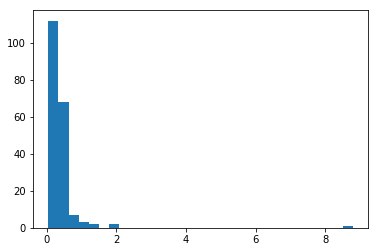

In [37]:
plt.hist(full_syncIC[15],30)

<Container object of 3 artists>

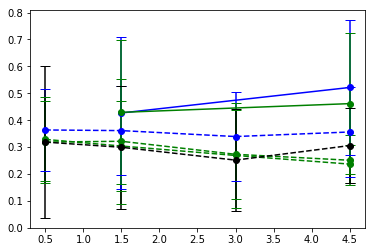

In [37]:
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[:4])/np.array(PI1[:4]),yerr=STDsyncIC[:4],ls='--',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[4:8])/np.array(PI1[4:8]),yerr=STDsyncIC[4:8],ls='--',marker='o', capsize=5, capthick=1,color='g')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[8:12])/np.array(PI1[8:12]),yerr=STDsyncIC[8:12],ls='--',marker='o', capsize=5, capthick=1,color='g')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[12:16])/np.array(PI1[12:16]),yerr=STDsyncIC[12:16],ls='--',marker='o', capsize=5, capthick=1,color='k')

plt.errorbar([1.5,4.5], np.array(PI_IC1[16:18])/np.array(PI1[16:18]),yerr=STDsyncIC[16:18],ls='-',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([1.5,4.5], np.array(PI_IC1[18:20])/np.array(PI1[18:20]),yerr=STDsyncIC[18:20],ls='-',marker='o', capsize=5, capthick=1,color='g')

# plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[20:24])/np.array(PI1[20:24]),yerr=STDsyncIC[20:24],ls='-.',marker='o', capsize=5, capthick=1,color='b')
# plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[24:28])/np.array(PI1[24:28]),yerr=STDsyncIC[24:28],ls='-.',marker='o', capsize=5, capthick=1,color='g')

# plt.errorbar([0.5,1.5,3.0,4.5,6.0], np.array(PI_IC1[28:33])/np.array(PI1[28:33]),yerr=STDsyncIC[28:33],ls=':',marker='o', capsize=5, capthick=1,color='b')
# plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[33:37])/np.array(PI1[33:37]),yerr=STDsyncIC[33:37],ls=':',marker='o', capsize=5, capthick=1,color='g')



#plt.ylim(0.2,0.6)

<Container object of 3 artists>

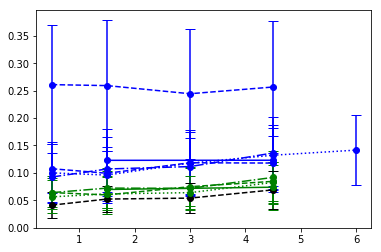

In [61]:
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[:4]),yerr=STD_IC1[:4],ls='--',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[4:8]),yerr=STD_IC1[4:8],ls='--',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[8:12]),yerr=STD_IC1[8:12],ls='--',marker='o', capsize=5, capthick=1,color='g')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[12:16]),yerr=STD_IC1[12:16],ls='--',marker='o', capsize=5, capthick=1,color='k')

plt.errorbar([1.5,4.5], np.array(PI_IC1[16:18]),yerr=STD_IC1[16:18],ls='-',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([1.5,4.5], np.array(PI_IC1[18:20]),yerr=STD_IC1[18:20],ls='-',marker='o', capsize=5, capthick=1,color='g')

plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[20:24]),yerr=STD_IC1[20:24],ls='-.',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[24:28]),yerr=STD_IC1[24:28],ls='-.',marker='o', capsize=5, capthick=1,color='g')

plt.errorbar([0.5,1.5,3.0,4.5,6.0], np.array(PI_IC1[28:33]),yerr=STD_IC1[28:33],ls=':',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[33:37]),yerr=STD_IC1[33:37],ls=':',marker='o', capsize=5, capthick=1,color='g')



<Container object of 3 artists>

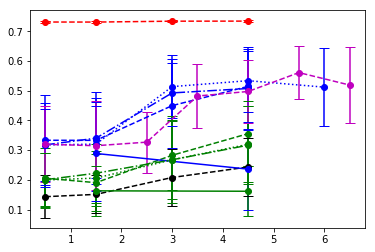

In [4]:
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI1[:4]),yerr=STD1[:4],ls='--',marker='o', capsize=5, capthick=1,color='r')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI1[4:8]),yerr=STD1[4:8],ls='--',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI1[8:12]),yerr=STD1[8:12],ls='--',marker='o', capsize=5, capthick=1,color='g')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI1[12:16]),yerr=STD1[12:16],ls='--',marker='o', capsize=5, capthick=1,color='k')

plt.errorbar([1.5,4.5], np.array(PI1[16:18]),yerr=STD1[16:18],ls='-',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([1.5,4.5], np.array(PI1[18:20]),yerr=STD1[18:20],ls='-',marker='o', capsize=5, capthick=1,color='g')

plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI1[20:24]),yerr=STD1[20:24],ls='-.',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI1[24:28]),yerr=STD1[24:28],ls='-.',marker='o', capsize=5, capthick=1,color='g')

plt.errorbar([0.5,1.5,3.0,4.5,6.0], np.array(PI1[28:33]),yerr=STD1[28:33],ls=':',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI1[33:37]),yerr=STD1[33:37],ls=':',marker='o', capsize=5, capthick=1,color='g')

plt.errorbar([0.5,1.5,2.5,3.5,4.5,5.5,6.5], np.array(PI1[36:43]),yerr=STD1[36:43],ls='--',marker='o', capsize=5, capthick=1,color='m')



In [4]:
from matplotlib import gridspec

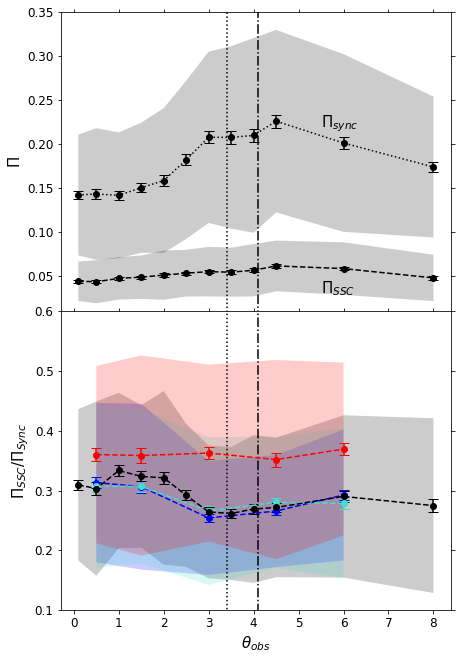

In [21]:
plt.figure(figsize=(7,11))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])
# the fisrt subplot
ax0 = plt.subplot(gs[0])

#ax0.errorbar(angles, np.array(PI_IC1[:4]),yerr=STD_IC1[:4],ls='--',marker='o', capsize=5, capthick=1,color='r')
#ax0.errorbar(angles4, np.array(PI_IC1[4:9]),yerr=STD_IC1[4:9],ls='--',marker='o', capsize=5, capthick=1,color='b')
#ax0.errorbar(angles4, np.array(PI_IC1[9:14]),yerr=STD_IC1[9:14],ls='--',marker='o', capsize=5, capthick=1,color='g')
ax0.errorbar(angles6, np.array(PI_IC1[15:]),yerr=STD_IC1[15:]/np.sqrt(200),ls='--',marker='o', capsize=5, capthick=1,color='k')
ax0.errorbar(angles6, np.array(PI1[15:]),yerr=STD1[15:]/np.sqrt(200),ls=':',marker='o', capsize=5, capthick=1,color='k')
ax0.plot([3.4,3.4],[0.0,1.0],"k:")
ax0.plot([4.1,4.1],[0.0,1.0],"k-.")
#ax0.set_ylabel(r'$\Pi_{SSC}$', size='13')
ax0.set_ylabel(r'$\Pi$', size='15')
ax0.set_ylim(0.01,0.35)
ax0.tick_params(axis="y", labelsize=12)
ax0.fill_between(angles6, np.array(PI_IC1[15:])-STD_IC1[15:], np.array(PI_IC1[15:])+STD_IC1[15:],alpha=0.2, facecolor='k')
ax0.fill_between(angles6, np.array(PI1[15:])-STD1[15:], np.array(PI1[15:]) +STD1[15:],alpha=0.2, facecolor='k')
ax0.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True)
ax0.text(5.5,0.219,r'$\Pi_{sync}$', fontsize=15)
ax0.text(5.5,0.03,r'$\Pi_{SSC}$', fontsize=15)

# ax1 = plt.subplot(gs[1], sharex=ax0)
# ax1.errorbar([0.5,1.5,3.0,4.5], np.array(PI1[:4]),yerr=STD1[:4],ls='--',marker='o', capsize=5, capthick=1,color='r')
# ax1.errorbar(angles4, np.array(PI1[4:9]),yerr=STD1[4:9],ls='--',marker='o', capsize=5, capthick=1,color='b')
# ax1.errorbar(angles4, np.array(PI1[9:14]),yerr=STD1[9:14],ls='--',marker='o', capsize=5, capthick=1,color='g')
# ax1.errorbar(angles6, np.array(PI1[14:]),yerr=STD1[14:],ls='--',marker='o', capsize=5, capthick=1,color='k')
# ax1.plot([3.4,3.4],[0.0,1.0],':')
# ax1.plot([4.1,4.1],[0.0,1.0],":")
# ax1.set_ylabel(r'$\Pi_{Sync}$', size='13')
# ax1.set_ylim(0.0,0.75)
# ax1.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
#                      bottom=True, top=True, left=True, right=True)

ax2 = plt.subplot(gs[1], sharex=ax0)
ax2.errorbar(angles, np.array(PI_IC1[:5])/np.array(PI1[:5]),yerr=STDsyncIC[:5]/np.sqrt(200),ls='--',marker='o', capsize=5, capthick=1,color='r')
ax2.errorbar(angles4, np.array(PI_IC1[5:10])/np.array(PI1[5:10]),yerr=STDsyncIC[5:10]/np.sqrt(200),ls='--',marker='o', capsize=5, capthick=1,color='b')
ax2.errorbar(angles4, np.array(PI_IC1[10:15])/np.array(PI1[10:15]),yerr=STDsyncIC[10:15]/np.sqrt(200),ls='--',marker='o', capsize=5, capthick=1,color='turquoise')
ax2.errorbar(angles6, np.array(PI_IC1[15:])/np.array(PI1[15:]),yerr=STDsyncIC[15:]/np.sqrt(200),ls='--',marker='o', capsize=5, capthick=1,color='k')

ax2.fill_between(angles6, np.array(PI_IC1[15:])/np.array(PI1[15:])-STDsyncIC[15:], np.array(PI_IC1[15:])/np.array(PI1[15:])+STDsyncIC[15:],alpha=0.2, facecolor='k')
ax2.fill_between(angles4, np.array(PI_IC1[5:10])/np.array(PI1[5:10])-STDsyncIC[5:10], np.array(PI_IC1[5:10])/np.array(PI1[5:10])+STDsyncIC[5:10],alpha=0.2, facecolor='b')
ax2.fill_between(angles4, np.array(PI_IC1[10:15])/np.array(PI1[10:15])-STDsyncIC[10:15], np.array(PI_IC1[10:15])/np.array(PI1[10:15])+STDsyncIC[10:15],alpha=0.2, facecolor='turquoise')
ax2.fill_between(angles, np.array(PI_IC1[:5])/np.array(PI1[:5])-STDsyncIC[:5], np.array(PI_IC1[:5])/np.array(PI1[:5])+STDsyncIC[:5],alpha=0.2, facecolor='r')


ax2.plot([3.4,3.4],[0.0,1.0],"k:")
ax2.plot([4.1,4.1],[0.0,1.0],"k-.")
ax2.set_ylim(0.1,0.6)
ax2.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                     bottom=True, top=True, left=True, right=True)

ax2.set_ylabel(r'$\Pi_{SSC} / \Pi_{Sync}$', size='15')
ax2.set_xlabel(r'$\theta_{obs}$', size='15')
plt.setp(ax0.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax2.yaxis.get_major_ticks()
ax2.tick_params(axis="x", labelsize=12)
ax2.tick_params(axis="y", labelsize=12)
#yticks[-2].label1.set_visible(False)

plt.subplots_adjust(hspace=.0)
plt.savefig("final_mm.pdf", bbox_inches='tight')
plt.show()


<Container object of 3 artists>

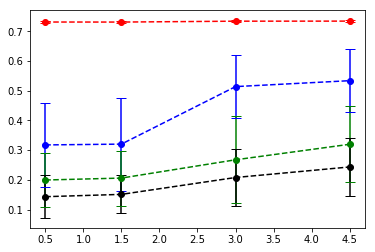

In [6]:
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI1[:4]),yerr=STD1[:4],ls='--',marker='o', capsize=5, capthick=1,color='r')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI1[28:32]),yerr=STD1[28:32],ls='--',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI1[33:37]),yerr=STD1[33:37],ls='--',marker='o', capsize=5, capthick=1,color='g')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI1[12:16]),yerr=STD1[12:16],ls='--',marker='o', capsize=5, capthick=1,color='k')

<Container object of 3 artists>

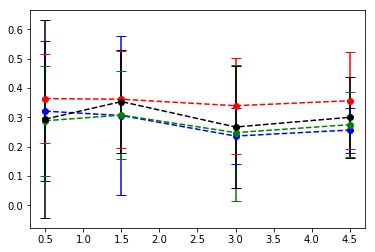

In [8]:
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[:4])/np.array(PI1[:4]),yerr=STDsyncIC[:4],ls='--',marker='o', capsize=5, capthick=1,color='r')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[28:32])/np.array(PI1[28:32]),yerr=STDsyncIC[28:32],ls='--',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[33:37])/np.array(PI1[33:37]),yerr=STDsyncIC[33:37],ls='--',marker='o', capsize=5, capthick=1,color='g')
plt.errorbar([0.5,1.5,3.0,4.5], np.array(PI_IC1[12:16])/np.array(PI1[12:16]),yerr=STDsyncIC[12:16],ls='--',marker='o', capsize=5, capthick=1,color='k')


In [ ]:
######## Romani rot

In [54]:
working_path4 = '/home/groups/kipac/alpv95/Romani_rot/'
name = 'rot'
angle = 1.5

rotlist = [working_path4 + name + str(angle) + '_37_60' + '/TESTFIL' + str(i) + '.txt' for i in range(1,65)]
keyp_path = working_path4 + name + str(angle) + '_37_60' + '/keyparams_final.txt'
freq_path = working_path4 + name + str(angle) + '_37_60' + '/freqrange_final.txt'

rotations = np.array([np.loadtxt(file) for file in rotlist])

for i in range(64):
    if rotations[i].shape[0] == 0:
        rotations[i] = np.empty((50,9))
        rotations[i][:] = np.nan
        

In [57]:
Xrot = np.array([rotations[i][12,1] for i in range(64)])
XrotIC = np.array([rotations[i][13,4] for i in range(64)])
Xrot2 = np.array([rotations[i][30,1] for i in range(64)])
Xpi2 = np.array([rotations[i][30,0] for i in range(64)])
Xpi = np.array([rotations[i][12,0] for i in range(64)])
XpiIC = np.array([rotations[i][13,3] for i in range(64)])

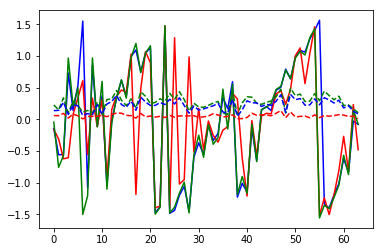

In [58]:
plt.plot(range(64),Xrot,'b')
plt.plot(range(64),XrotIC,'r')

plt.plot(range(64),Xrot2,'g')
plt.plot(range(64),Xpi2,'g--')

plt.plot(range(64),Xpi,'b--')
plt.plot(range(64),XpiIC,'r--')

In [29]:
plt.plot()

(50, 9)

In [24]:
np.empty((3,3))[:] = np.nan

In [9]:
np.array(PI_IC1)/np.array(PI1)

array([0.36364203, 0.36124127, 0.34461976, 0.36178752, 0.32862032,
       0.30393869, 0.27389237, 0.24372793, 0.3187633 , 0.32161414,
       0.28058693, 0.26298063])

In [93]:
np.array(PI_IC1)/np.array(PI1)

array([0.38949052])

Text(0,0.5,'$\\Pi$')

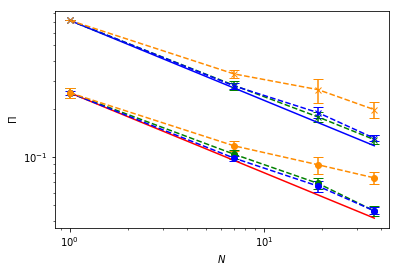

In [87]:
#plt.figure(figsize=(7,6))
plt.errorbar([1,7,19,37],PI_IC[:4],yerr=STD_IC[:4],ls='--',marker='o', capsize=5, capthick=1,color='g')
plt.errorbar([1,7,19,37],PI_IC[4:]*np.array([1,1.5,0.9,1]),yerr=np.array(STD_IC[4:])*0.5,ls='--',marker='o', capsize=5, capthick=1,color='b')
plt.errorbar([1,7,19,37],PI_IC1[:4],yerr=STD_IC1[:4],ls='--',marker='o', capsize=5, capthick=1,color='darkorange')

plt.plot([1,7,19,37],[PI_IC[0],PI_IC[0]/np.sqrt(7),PI_IC[0]/np.sqrt(19),PI_IC[0]/np.sqrt(37)],color='r')

plt.errorbar([1,7,19,37],PI[:4],yerr=STD[:4],ls='--',marker='x', capsize=5, capthick=1,color='g')
plt.errorbar([1,7,19,37],PI[4:]*np.array([1,1.5,0.9,1]),yerr=np.array(STD[4:])*0.5,ls='--',marker='x', capsize=5, capthick=1,color='b')
plt.errorbar([1,7,19,37],PI1[:4],yerr=STD1[:4],ls='--',marker='x', capsize=5, capthick=1,color='darkorange')

plt.plot([1,7,19,37],[PI[0],PI[0]/np.sqrt(7),PI[0]/np.sqrt(19),PI[0]/np.sqrt(37)],color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$N$')
plt.ylabel(r'$\Pi$')

Text(0,0.5,'$\\Pi / \\Pi_1$')

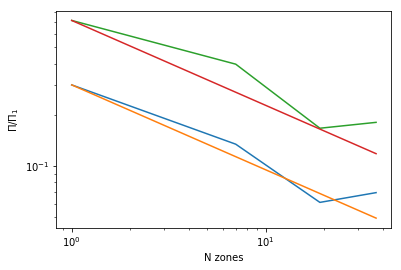

In [21]:
plt.plot([1,7,19,37],PI_IC)
plt.plot([1,7,19,37],[PI_IC[0],PI_IC[0]/np.sqrt(7),PI_IC[0]/np.sqrt(19),PI_IC[0]/np.sqrt(37)])
plt.plot([1,7,19,37],PI)
plt.plot([1,7,19,37],[PI[0],PI[0]/np.sqrt(7),PI[0]/np.sqrt(19),PI[0]/np.sqrt(37)])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N zones')
plt.ylabel(r'$\Pi / \Pi_1$')

In [54]:
error = np.array(PI_IC)/np.array(PI) * np.sqrt((np.array(STD)/np.array(PI))**2 + (np.array(STD_IC)/np.array(PI_IC))**2)
error1 = np.array(PI_IC1)/np.array(PI1) * np.sqrt((np.array(STD1)/np.array(PI1))**2 + (np.array(STD_IC1)/np.array(PI_IC1))**2)



In [57]:
error[5] = error[5]*0.5
error[6] = error[6]*0.5
error[7] = error[7]*0.5


Text(0.5,0,'$N$')

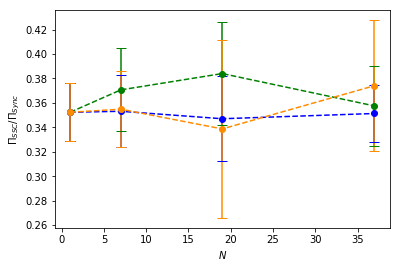

In [72]:
plt.errorbar([1,7,19,37],np.array(PI_IC[:4])/np.array(PI[:4]),yerr=error[:4],ls='--',marker='o', capsize=5, capthick=1,color='g')
plt.errorbar([1,7,19,37],np.array(PI_IC[4:])/np.array(PI[4:]),yerr=error[4:],ls='--',marker='o', capsize=5, capthick=1, color='b')
plt.errorbar([1,7,19,37],np.array(PI_IC1[:4])/np.array(PI1[:4]),yerr=error1[:4],ls='--',marker='o', capsize=5, capthick=1,color='darkorange')
plt.ylabel(r"$\Pi_{SSC} / \Pi_{Sync}$")
plt.xlabel(r"$N$")